In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 1000) # shows all the columns
pd.set_option('display.float_format', lambda x: '%.4f' % x) # displays outputs with 1 decimal
pd.set_option('display.max_rows', 10000) # shows all the rows
%matplotlib inline

## Basic exploration of the entire dataset

I do some basic exploration of the King county dataset to clarify the trends of the house price in the King County Housing data

In [3]:
# importing the data
data=pd.read_csv('kc_house_data-2.csv')
#Viewing first 5 rows of the dataset
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.0000,1180,5650,1.0000,nan,0.0000,3,7,1180,0,1955,0.0000,98178,47.5112,-122.2570,1340,5650
1,6414100192,12/9/2014,538000,3,2.2500,2570,7242,2.0000,0.0000,0.0000,3,7,2170,400,1951,1991.0000,98125,47.7210,-122.3190,1690,7639
2,5631500400,2/25/2015,180000,2,1.0000,770,10000,1.0000,0.0000,0.0000,3,6,770,0,1933,nan,98028,47.7379,-122.2330,2720,8062
3,2487200875,12/9/2014,604000,4,3.0000,1960,5000,1.0000,0.0000,0.0000,5,7,1050,910,1965,0.0000,98136,47.5208,-122.3930,1360,5000
4,1954400510,2/18/2015,510000,3,2.0000,1680,8080,1.0000,0.0000,0.0000,3,8,1680,0,1987,0.0000,98074,47.6168,-122.0450,1800,7503


In [4]:
data.shape

(21597, 21)

The data has 21K observations and 21 columns. Looking at above table, we see that 'id' seems to be an unique identifier for each sale record and sqft_living is the sum of sqft basement and sqft above

Let's get a  quick description of the data using the info() method.

Out of 21 variables : according to the data, there is  1 is categorical variable(object) and rest 20 are numerical (int/float).
However, according the data description provided with the dataset , variable such as  waterfront, view, condition, grade, yr_built, yr_renovated and zipcode are categorical varibles 

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Checking if any missing values?

Missing values can be a problem for linear models so checking if any columns have any missing values. If there are, those can be resolved during data cleaning . 

Let's see what percentage of missing values are there for these columns.

In [145]:
(data.isna().sum())/len(data)*100

id               0.0000
date             0.0000
price            0.0000
bedrooms         0.0000
bathrooms        0.0000
sqft_living      0.0000
sqft_lot         0.0000
floors           0.0000
waterfront      11.0015
view             0.2917
condition        0.0000
grade            0.0000
sqft_above       0.0000
sqft_basement    0.0000
yr_built         0.0000
yr_renovated    17.7895
zipcode          0.0000
lat              0.0000
long             0.0000
sqft_living15    0.0000
sqft_lot15       0.0000
dtype: float64

I see that features such 'waterfront' and 'yr_renovated' have around **11% and 17% of records missing and 'view' less than 1% missing**. We can resolve these during data cleaning. 

### Checking if there are any duplicated records

Here we are searching for observations which are completely identical. This is important as this can cause model to liarn bias from the duplicated samples

In [6]:
print("# of duplicated records :",data.duplicated().sum())

# of duplicated records : 0


We see, there are no duplicated records

### Distribution of the target (price) and outlier detection

Let's see the distribution of the price.

The describe method shows , 75% percentile of the data are below $645K priced houses

In [147]:
data['price'].describe()

count     21597.0000
mean     540296.5735
std      367368.1401
min       78000.0000
25%      322000.0000
50%      450000.0000
75%      645000.0000
max     7700000.0000
Name: price, dtype: float64

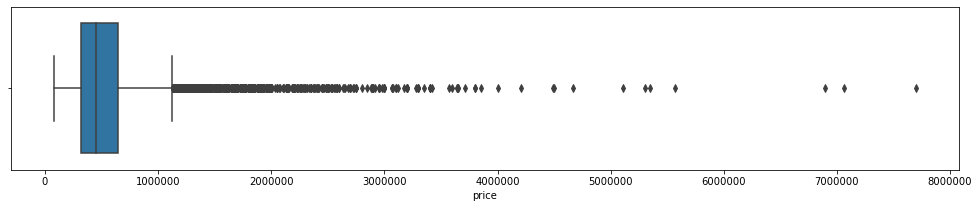

In [148]:
fig, ax = plt.subplots(figsize=(17,3))
sns.boxplot(x='price',data=data)
plt.ticklabel_format(style='plain', axis='x')

    The house price ranges between $78,000 - $7.7 million

The real estate investors are targeting majorly in investing houses which are relevant to middle-income individuals. This ensures a steady flow of revenue for the investors as these houses are more likely to get sold off easily. So, I will keep those houses in the data which are essentially less than a million dollar or with standard 2-6 bedrooms.

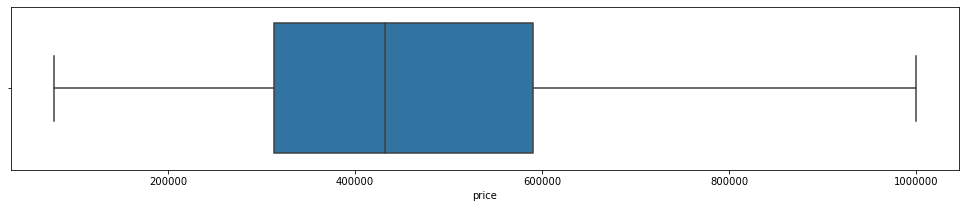

In [7]:
data = data[(data['price']<1000000) & (data['bedrooms']<=6)]
fig, ax = plt.subplots(figsize=(17,3))
sns.boxplot(x='price',data=data)
plt.ticklabel_format(style='plain', axis='x')

    Now, the house price ranges between $78,000 - < $1 million

## Data Exploration and Cleaning

### Exploration of Numerical variables
Following table shows a description of the numerical variables where on a quick glance we see the min and max values of the numerical features and also their average value. Let's explore further by visualizing and pairing the numerical variables with price and see what kind of relation they each offer with price of the house. 

In [9]:
# Summary of the numerical variables
numerical_vars=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement','lat', 'long', 'sqft_living15', 'sqft_lot15']
data[numerical_vars].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,20060.0000,20060.0000,20060.0000,20060.0000,20060.0000,20060.0000,20060.0000,20060.0000,20060.0000,20060.0000,20060.0000
mean,3.3105,2.0354,1951.2040,14512.9905,1.4705,1689.7061,261.4980,47.5557,-122.2131,1907.6254,12383.5012
std,0.8583,0.6971,751.4189,40030.8131,0.5363,709.1000,402.3165,0.1418,0.1425,600.6418,26448.2356
min,1.0000,0.5000,370.0000,520.0000,1.0000,370.0000,0.0000,47.1559,-122.5190,399.0000,651.0000
25%,3.0000,1.5000,1390.0000,5000.0000,1.0000,1170.0000,0.0000,47.4572,-122.3300,1460.0000,5045.7500
50%,3.0000,2.0000,1840.0000,7500.0000,1.0000,1500.0000,0.0000,47.5654,-122.2320,1790.0000,7529.0000
75%,4.0000,2.5000,2400.0000,10248.5000,2.0000,2080.0000,500.0000,47.6801,-122.1220,2260.0000,9831.2500
max,6.0000,6.0000,7120.0000,1651359.0000,3.5000,5710.0000,2720.0000,47.7776,-121.3150,4950.0000,871200.0000


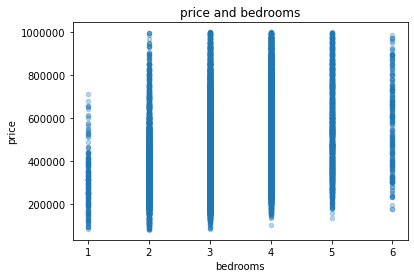

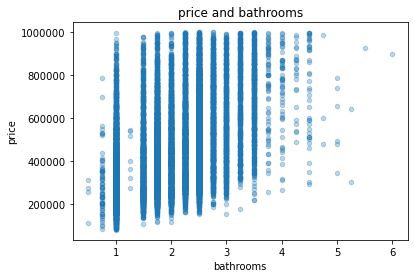

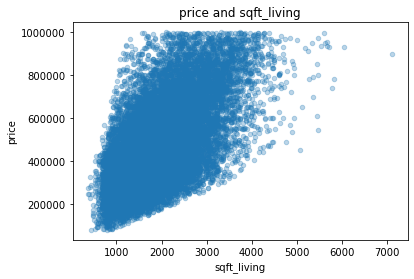

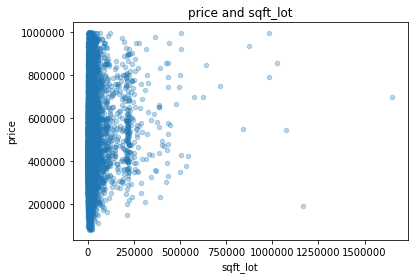

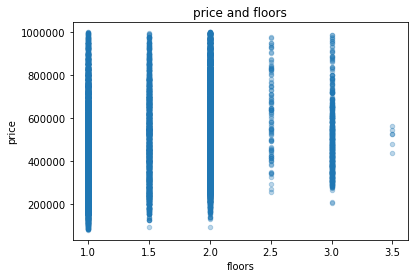

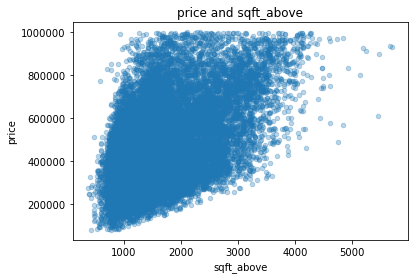

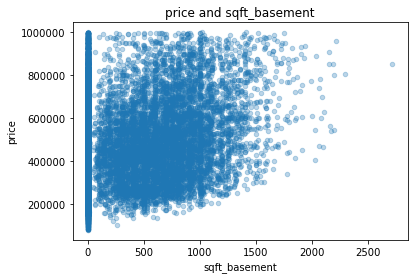

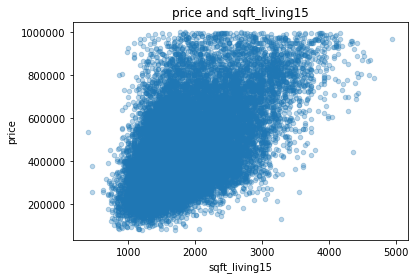

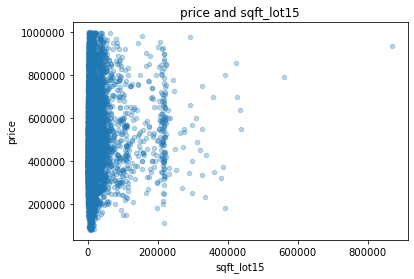

In [10]:
num_features=['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                                                  'sqft_living15', 'sqft_lot15']
for feature in num_features:
    data.plot(kind='scatter', x=feature, y='price', alpha=0.3)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
#     title="price and "+ feature
    plt.title("price and {}".format(feature))

From the above set of graphs , following observations are done:

1.**Price and number of bedrooms** - Price of a house increases with the number of bedrooms . With a little dive down, we see there is a *difference of just $5K* , however this is being said by not taking into account the influence of other features in determining the price


2.**Price and bathrooms** - the relation between them seems linear, so if there are more bathrooms in the house, price of the houses also increases


3.**Price and living area(sqft) of the house** - Price of the house increases with the interior living space in sqft. They are linear in nature.


4.**Price and lot area(sqft) of the house** - Price and sqft_lot do not have any relationship. This feature doesnt seem very predictive in determining house price


5.**Price and #of floors in the house** - Price of a house increases slightly with the number of floors .


6.**Price and area above (sqft) of the house** - Price of the house increases with the living area above in sqft. They are linear in nature.


7.**Price and area of basement(sqft) of the house** - Price and sqft_basement do not have any relationship. This feature doesnt seem very predictive in determining house price


8.**Price of the house and living area of nearest 15 neighbor-houses(sqft)** - Price of the house increases with the interior  living space in sqft. They are linear in nature.


9.**Price of the house and avg lot area of nearest 15 neighbor-houses(sqft)** - Price and sqft_lot do not have any relationship. This feature doesnt seem very predictive in determining house price

 

In [153]:
print("Difference of price between a 5-bd and 6-bd house=:",(data[(data['bedrooms']==6)]['price'].mean())-(data[(data['bedrooms']==5)]['price'].mean()));

Difference of price between a 5-bd and 6-bd house=: 5039.634921435616


### Exploration of Categorical variables
As we have seen in the description of the dataset:  date, waterfront, view, condition, grade, yr_built, yr_renovated and zipcode are categorical vars. I want to explore how may unique values each of these variables have and which levels for each of them are the most frequent. To do this, let's create a list of these features and create a temporary dataframe where we assign them as an object variable.

In [11]:
categorical_vars=['date','waterfront', 'view', 'condition', 'grade','yr_built', 'yr_renovated', 'zipcode']
temp_df=data[categorical_vars].astype('object')
temp_df[categorical_vars].describe()

,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
count,20060,17837.0000,20003.0000,20060,20060,20060,16503.0000,20060
unique,370,2.0000,5.0000,5,10,116,70.0000,70
top,6/23/2014,0.0000,0.0000,3,7,2014,0.0000,98038
freq,134,17788.0000,18545.0000,13032,8922,492,15909.0000,586


#### Anayzing categorical variables and feature engineering

In [13]:
def calculate_mean_target_per_category(df, var):
    
    """
calculates the mean price per category of a categorical variable
    """
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series((df[var].value_counts() / total_houses)*100).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['price'].median().reset_index(),
                            on=var,
                            how='left')
    return temp_df

def plot_categories(df, var):
    
    """
        plots percentage of the categorical variable in the left y axis against the categories 
        with the average price of the target
    """
    fig, ax = plt.subplots(figsize=(15, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["price"], color='green', label='Average Sale Price')
    ax.axhline(y=5, color='red',label='5% of total house')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.legend()
    plt.ticklabel_format(style='plain', axis='y')

*waterfront*
- houses with waterfront have a higher average sale price compared to houses with no waterfront and just comprises 5% of the totat # of houses. So, houses with missing values will be populated with 0 as that will ensure similar distribution

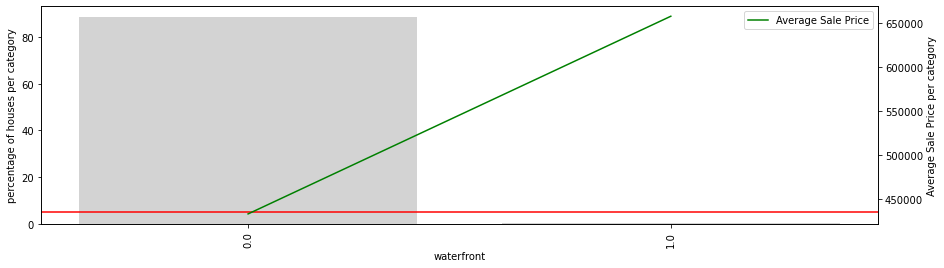

In [14]:
temp_df = calculate_mean_target_per_category(data, 'waterfront')
plot_categories(temp_df,'waterfront')

*view*

- Better is the view of the property, higher is the price . However, better view (1-4) comprises less than 5% houses

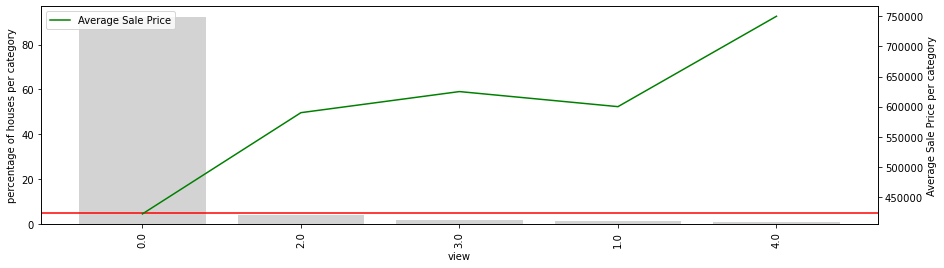

In [15]:
temp_df = calculate_mean_target_per_category(data, 'view')
plot_categories(temp_df,'view')

*condition*
- This variable is ordinal in nature.Higher the number in condition, higher is the average sale price.
- Condition 3 houses captures the highest percentage in the market

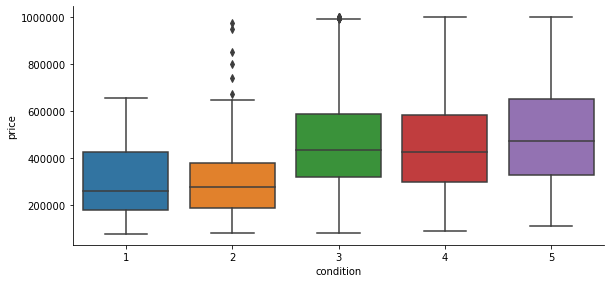

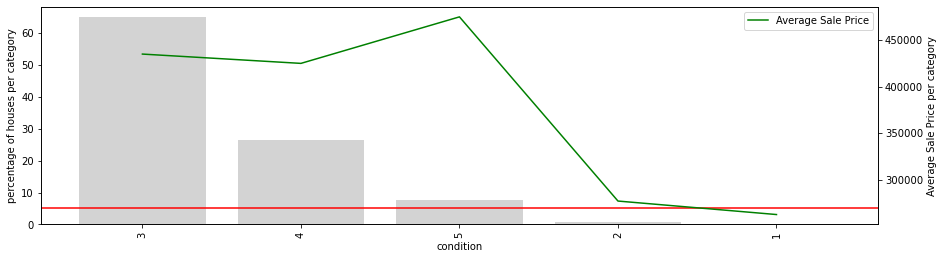

In [20]:
sns.catplot(x='condition', y='price', data=data, kind="box", height=4, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
temp_df = calculate_mean_target_per_category(data, 'condition')
plot_categories(temp_df,'condition')

*grade*
- This variable is ordinal in nature.Higher the grade of the house, higher is the average sale price. 
- Grade (7-8) occupies the maximum market. Grade (1-5) have less than 5% houses and similar avg sale price ,  and grade(10-13) have also less than 5% houses with similar average house price

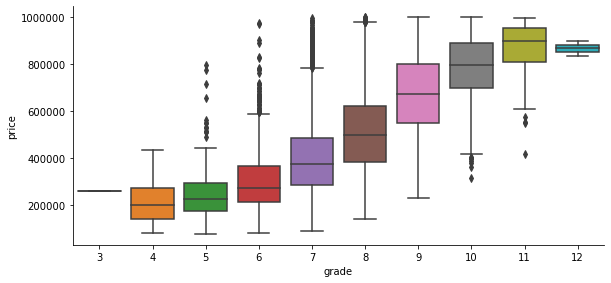

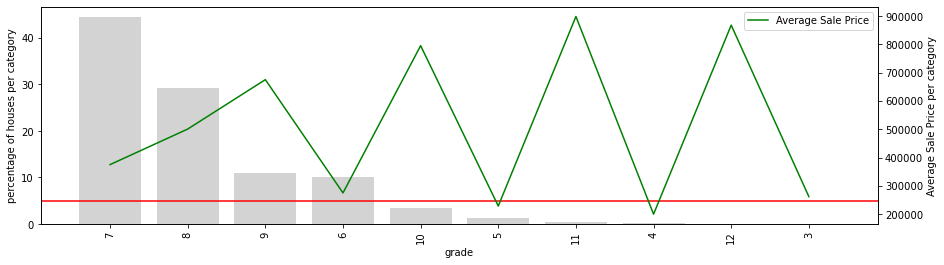

In [22]:
sns.catplot(x='grade', y='price', data=data, kind="box", height=4, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
temp_df = calculate_mean_target_per_category(data, 'grade')
plot_categories(temp_df,'grade')

*yr_renovated*
- from the below diagram we see, maximum number of houses were not renovated. Also, the price of the house does not seem to have any pattern with the year of renovation. This variable has some missing values, which will be filled with 0 as that will ensure similar distribution

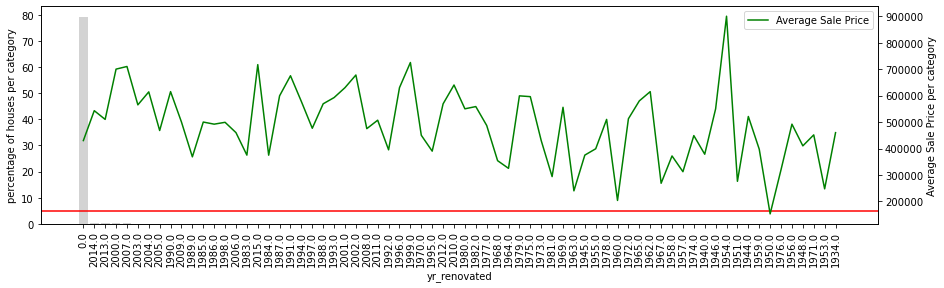

In [23]:
temp_df = calculate_mean_target_per_category(data, 'yr_renovated')
plot_categories(temp_df,'yr_renovated')

*zipcodes*
- Since 70 categories of zipcode will increase the dimension by a lot, creating a zipcode_group based on the first 3 characters which captures specific regions/cities of the KingCounty . This reduces to 19 zipcode groups
- Based on these groups we see the average sale price of the houses are quite different form one zipcode group to another

In [24]:
data['zipcode_group']=(data['zipcode'].astype(str).str[0:4]).astype(int)
data['zipcode_group'].nunique()

19

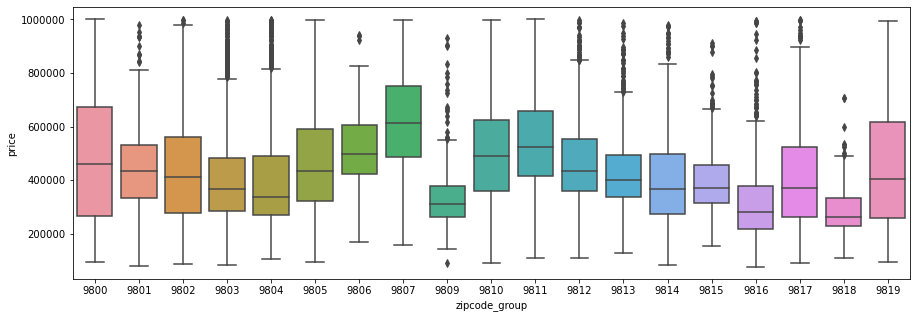

In [27]:
# Plotting the zipcode_group
plt.figure(figsize=(15,5))
sns.boxplot(x='zipcode_group', y='price', data=data, )
plt.ticklabel_format(style='plain', axis='y');

#### Date variable
- Extracting the month feature and visualizing if there is any seasonility effect on price. This can help in generalising the model which will be used for future use
- Plotting month against price, we see more number of houses sold in summer months (April-July)

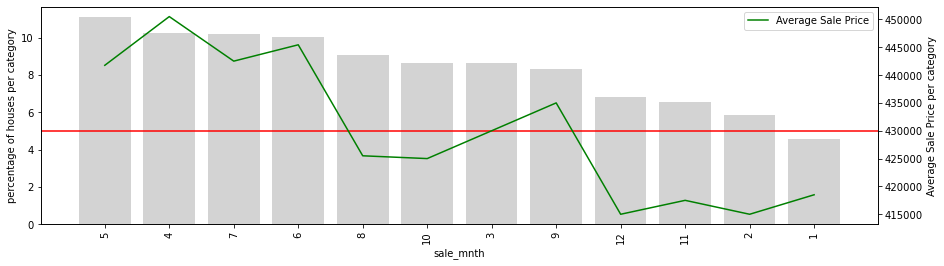

In [29]:
data['date']=pd.to_datetime(data['date'])
data['sale_mnth']=data['date'].dt.month
temp_df = calculate_mean_target_per_category(data, 'sale_mnth')
plot_categories(temp_df,'sale_mnth')

## Visualizing the locations of houses across few features

King County is one of the expensive markets in USA and so to get a sense of the spacial pattern of houses with respective to price and condition of the house , we try to visualize that. This will help investorss to get an idea how price and present condition of these houses vary from region to region in order to take better business decisions

In [30]:
# Function which creates a scatter plot like a map with color code
def locator(data, latitude, longitude, feature):
    
    """Create a scatterplot from lat/long data with color code.
    Parameters:
        data: dataset
        latitude: latitude values
        longitude: longitude values
        feature: the name of the column whose values you want to use as 
            the values for your color code. Pass this as a string.
    Dependencies: matplotlib
    Returns: scatterplot"""
    
    plt.figure(figsize=(15,10))
    cmap = plt.cm.get_cmap('RdYlBu')
    sc = plt.scatter(data[longitude], data[latitude], 
                     c=data[feature], vmin=min(data[feature]), 
                     vmax=max(data[feature]), alpha=0.5,s=5, cmap=cmap)
    plt.colorbar(sc)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('{} of house by location'.format(feature), fontsize=18)
    plt.show();

*Location and price*
- Cities like Seattle, Bellevue, Kirkland , Redmond have expensive mid-value houses(blue-dots) around Lake Washington. Houses near waterfront also have some high-valued homes. Less expensive one's are found on the south-west part of the County

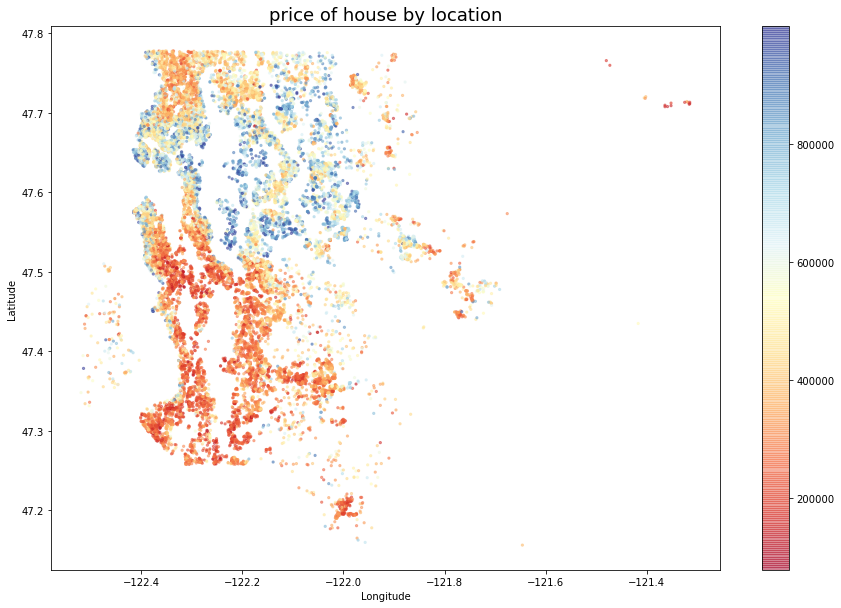

In [31]:
locator(data, 'lat', 'long', 'price')

*Location and grade*
- The highest grade quality (9 and above) of houses are found near Bellevue and Redmond . The data contains mostly mid-grade houses between 6-8. Grade 6 and above are found all over King County, which is great for the investors

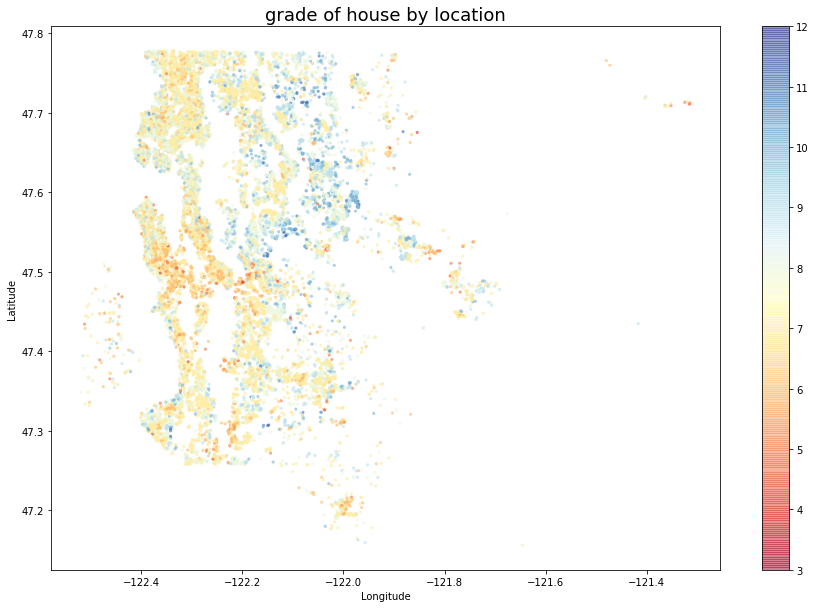

In [32]:
locator(data, 'lat', 'long', 'grade')

*Location and condition*
- Condition of houses 3 and above are found all over the King County,  which is good for investors as they do not have to spend money for bettering the condition 

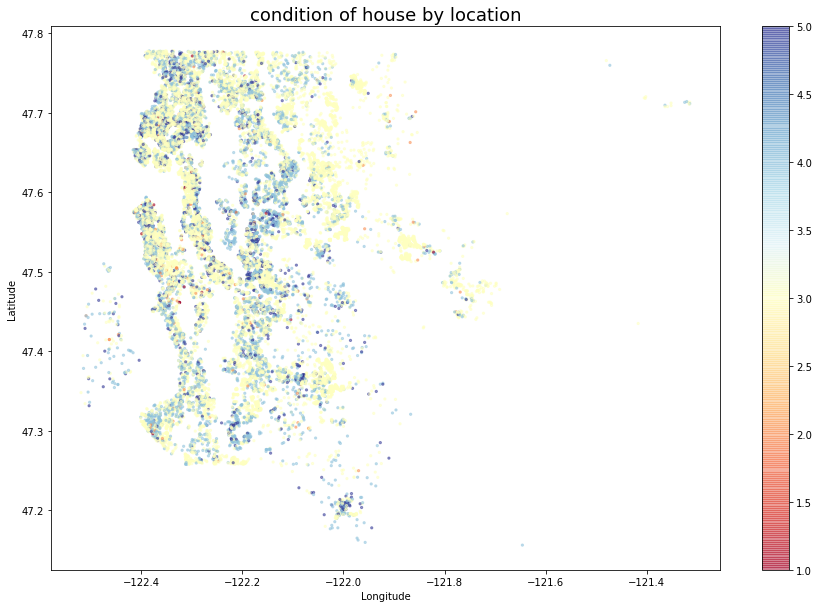

In [33]:
locator(data, 'lat', 'long', 'condition')

*Location and zipcode_groups*
- Condition of houses 3 and above are found all over the King County, which is good for investors as they do not have to spend money for bettering the condition 

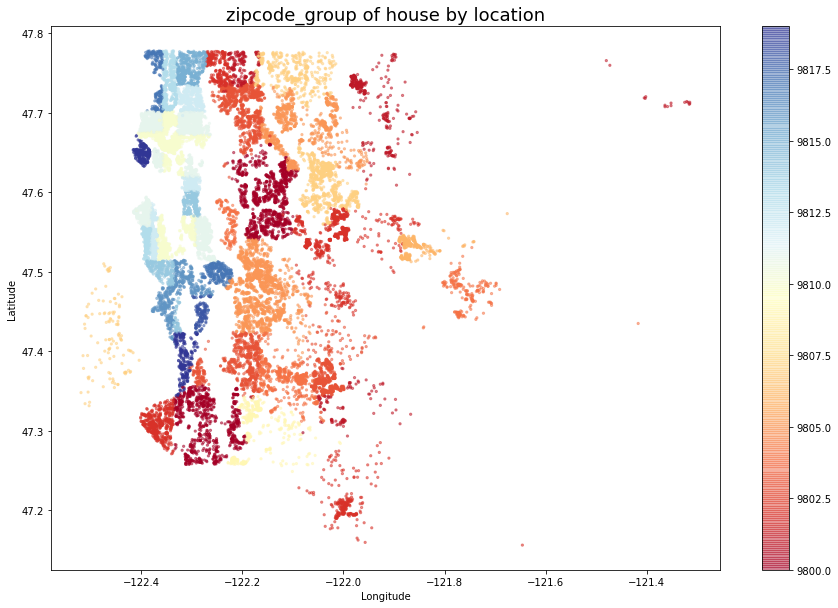

In [34]:
locator(data, 'lat', 'long', 'zipcode_group')

### Dealing with the missing values
- As we saw in the EDA notebook, there were missing values in 3 variables: waterfront,view and yr_renovated. 
- Both waterfront and view has maximum values with level=0, so substituting the missing values with zero. 
- For yr_renovated feature, majority of the houses were not renovated, so populating the missing with zero

In [35]:
data2=data.fillna(0)